In [1]:
# %matplotlib notebook

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
import seaborn as sns
import matplotlib.pyplot as plt
import pathlib
plt.rcParams['figure.figsize'] = [13, 8]

In [5]:
path = pathlib.WindowsPath('C:\Python\Projects\crystal-phase-prediction\pkl_files\structure_df_hfo2_del.pkl')
df = pd.read_pickle(path)
df

,structure,name
0,"[[1.38867986 2.3864784 4.36482979] Hf, [3.587...",Ag_HfO2_cat_3.125_222_m.cif
1,"[[1.40181386 2.3944349 4.3885007 ] Hf, [3.606...",Ag_HfO2_cat_3.125_222_o.cif
2,"[[-8.57055872 -7.98390112 -6.2853237 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_p-o.cif
3,"[[-8.73105937 2.58337834 3.5977214 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_t.cif
4,"[[1.37820795 2.39009891 4.37039843] Hf, [3.622...",Ag_HfO2_cat_6.25_122_m.cif
...,...,...
1720,"[[ 1.26076304 -5.11876687 1.26075093] Hf, [ 1...",Zr_HfO2_inter_6.25_212_t.cif
1721,"[[ 1.2262443 -10.12402918 -3.43749088] Hf, ...",Zr_HfO2_inter_6.25_221_m.cif
1722,"[[1.39997305 0.20795941 1.85144277] Hf, [1.451...",Zr_HfO2_inter_6.25_221_o.cif
1723,"[[-8.97250742 -0.20890362 1.50328354] Hf, [-8...",Zr_HfO2_inter_6.25_221_p-o.cif


In [6]:
from matminer.featurizers.structure import XRDPowderPattern
xrd = XRDPowderPattern(two_theta_range=(5, 65))
df = xrd.fit_featurize_dataframe(df, 'structure')
df

,structure,name,xrd_0,xrd_1,xrd_2,xrd_3,xrd_4,xrd_5,xrd_6,xrd_7,...,xrd_51,xrd_52,xrd_53,xrd_54,xrd_55,xrd_56,xrd_57,xrd_58,xrd_59,xrd_60
0,"[[1.38867986 2.3864784 4.36482979] Hf, [3.587...",Ag_HfO2_cat_3.125_222_m.cif,4.163294e-94,2.126695e-80,8.339854e-68,2.510712e-56,5.802573e-46,1.029507e-36,1.402244e-28,1.466232e-21,...,3.366248e-02,3.330416e-02,1.666865e-02,0.018911,0.010830,0.019990,0.014474,0.021195,2.101365e-02,7.512736e-03
1,"[[1.40181386 2.3944349 4.3885007 ] Hf, [3.606...",Ag_HfO2_cat_3.125_222_o.cif,1.425278e-93,7.545307e-80,2.999259e-67,8.951811e-56,2.006170e-45,3.375860e-36,4.265411e-28,4.046665e-21,...,1.718201e-02,4.071149e-02,3.064061e-02,0.012806,0.020706,0.025123,0.015981,0.026507,9.700538e-03,6.676516e-04
2,"[[-8.57055872 -7.98390112 -6.2853237 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_p-o.cif,1.247942e-149,1.132106e-127,1.703542e-107,4.251978e-89,1.760362e-72,1.208887e-57,1.377025e-44,2.601783e-33,...,1.726533e-02,7.512397e-03,2.634535e-04,0.014588,0.020729,0.050490,0.045077,0.001179,7.069801e-07,8.044184e-12
3,"[[-8.73105937 2.58337834 3.5977214 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_t.cif,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.846123e-17,1.101831e-12,2.117069e-07,0.000534,0.020838,0.044549,0.016139,0.001454,4.465383e-03,1.036061e-03
4,"[[1.37820795 2.39009891 4.37039843] Hf, [3.622...",Ag_HfO2_cat_6.25_122_m.cif,6.262093e-11,1.541005e-07,2.952350e-05,4.403630e-04,5.113673e-04,4.623110e-05,3.253979e-07,1.783095e-10,...,3.055573e-02,3.008895e-02,1.683308e-02,0.019296,0.011096,0.020024,0.017230,0.021155,2.215140e-02,4.816403e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,"[[ 1.26076304 -5.11876687 1.26075093] Hf, [ 1...",Zr_HfO2_inter_6.25_212_t.cif,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.632147e-19,5.486837e-12,8.420608e-07,0.001336,0.030656,0.041784,0.001556,0.005553,7.398085e-03,1.000607e-04
1721,"[[ 1.2262443 -10.12402918 -3.43749088] Hf, ...",Zr_HfO2_inter_6.25_221_m.cif,1.652921e-95,1.745521e-81,1.303483e-68,6.883250e-57,2.570331e-46,6.787225e-37,1.267369e-28,1.673483e-21,...,3.985626e-02,2.611494e-02,1.789166e-02,0.012697,0.014278,0.019990,0.015363,0.008371,1.768239e-02,1.197895e-02
1722,"[[1.39997305 0.20795941 1.85144277] Hf, [1.451...",Zr_HfO2_inter_6.25_221_o.cif,1.675315e-12,1.191654e-08,5.714564e-06,1.847547e-04,4.027053e-04,5.917777e-05,5.862856e-07,3.915969e-10,...,3.154613e-02,3.551956e-02,2.094031e-02,0.016007,0.020304,0.025104,0.015427,0.013091,6.816907e-03,2.521811e-03
1723,"[[-8.97250742 -0.20890362 1.50328354] Hf, [-8...",Zr_HfO2_inter_6.25_221_p-o.cif,2.322144e-157,6.921018e-134,2.349946e-112,9.089770e-93,4.005484e-75,2.010778e-59,1.149954e-45,7.492104e-34,...,2.540069e-03,4.751250e-03,9.841309e-04,0.016372,0.052564,0.031121,0.004288,0.001452,1.540916e-04,2.050562e-07


In [7]:
labels_true = pd.read_pickle(r'C:\Python\Projects\crystal-phase-prediction\data_labels\labels_hfo2.pkl')
labels_true = labels_true.labels_0_4
labels_true = labels_true.values

In [90]:
from sklearn.utils import shuffle
X = df.iloc[:,2:]
# X, y_true = shuffle(X, y_true, random_state=0)
X

,xrd_0,xrd_1,xrd_2,xrd_3,xrd_4,xrd_5,xrd_6,xrd_7,xrd_8,xrd_9,...,xrd_51,xrd_52,xrd_53,xrd_54,xrd_55,xrd_56,xrd_57,xrd_58,xrd_59,xrd_60
0,4.163294e-94,2.126695e-80,8.339854e-68,2.510712e-56,5.802573e-46,1.029507e-36,1.402244e-28,1.466232e-21,1.176975e-15,7.252987e-11,...,3.366248e-02,3.330416e-02,1.666865e-02,0.018911,0.010830,0.019990,0.014474,0.021195,2.101365e-02,7.512736e-03
1,1.425278e-93,7.545307e-80,2.999259e-67,8.951811e-56,2.006170e-45,3.375860e-36,4.265411e-28,4.046665e-21,2.882661e-15,1.541877e-10,...,1.718201e-02,4.071149e-02,3.064061e-02,0.012806,0.020706,0.025123,0.015981,0.026507,9.700538e-03,6.676516e-04
2,1.247942e-149,1.132106e-127,1.703542e-107,4.251978e-89,1.760362e-72,1.208887e-57,1.377025e-44,2.601783e-33,8.154042e-24,4.238844e-16,...,1.726533e-02,7.512397e-03,2.634535e-04,0.014588,0.020729,0.050490,0.045077,0.001179,7.069801e-07,8.044184e-12
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.763485e-297,9.005578e-265,...,2.846123e-17,1.101831e-12,2.117069e-07,0.000534,0.020838,0.044549,0.016139,0.001454,4.465383e-03,1.036061e-03
4,6.262093e-11,1.541005e-07,2.952350e-05,4.403630e-04,5.113673e-04,4.623110e-05,3.253979e-07,1.783095e-10,9.575815e-15,1.061737e-10,...,3.055573e-02,3.008895e-02,1.683308e-02,0.019296,0.011096,0.020024,0.017230,0.021155,2.215140e-02,4.816403e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.624720e-308,4.235772e-274,...,3.632147e-19,5.486837e-12,8.420608e-07,0.001336,0.030656,0.041784,0.001556,0.005553,7.398085e-03,1.000607e-04
1721,1.652921e-95,1.745521e-81,1.303483e-68,6.883250e-57,2.570331e-46,6.787225e-37,1.267369e-28,1.673483e-21,1.562597e-15,1.031764e-10,...,3.985626e-02,2.611494e-02,1.789166e-02,0.012697,0.014278,0.019990,0.015363,0.008371,1.768239e-02,1.197895e-02
1722,1.675315e-12,1.191654e-08,5.714564e-06,1.847547e-04,4.027053e-04,5.917777e-05,5.862856e-07,3.915969e-10,1.966344e-14,1.395200e-10,...,3.154613e-02,3.551956e-02,2.094031e-02,0.016007,0.020304,0.025104,0.015427,0.013091,6.816907e-03,2.521811e-03
1723,2.322144e-157,6.921018e-134,2.349946e-112,9.089770e-93,4.005484e-75,2.010778e-59,1.149954e-45,7.492104e-34,5.560762e-24,4.701883e-16,...,2.540069e-03,4.751250e-03,9.841309e-04,0.016372,0.052564,0.031121,0.004288,0.001452,1.540916e-04,2.050562e-07


In [91]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [119]:
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

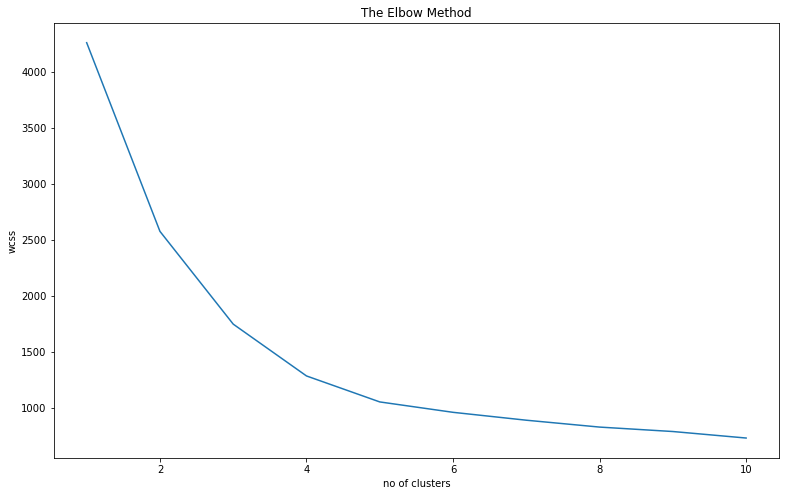

In [120]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [139]:
n_components=3
model = NMF(n_components, init='random', random_state=0, max_iter = 2000)
nmf_features_W = model.fit_transform(X)
nmf_componentes_H = model.components_

In [140]:
nmf_df = pd.DataFrame(nmf_componentes_H.T)
W_df = pd.DataFrame(nmf_features_W)
W_df # weights represent abundence of phase at a given nominal composition


,0,1,2
0,0.627170,0.000000,0.104004
1,0.011431,0.013026,1.009547
2,0.035866,0.765941,0.000000
3,0.000000,0.339269,0.162794
4,0.605517,0.006925,0.122632
...,...,...,...
1720,0.000000,0.261743,0.198640
1721,0.649946,0.052786,0.000000
1722,0.069042,0.034957,0.880672
1723,0.000000,0.468338,0.115901


In [141]:
W_df.describe()

,0,1,2
count,1725.000000,1725.000000,1725.000000
mean,0.204831,0.283068,0.258927
std,0.268562,0.283424,0.354067
min,0.000000,0.000000,0.000000
25%,0.007684,0.022579,0.011013
50%,0.046179,0.281910,0.122066
75%,0.599171,0.473205,0.201609
max,0.696241,0.782820,1.063411


In [142]:
kmeans = KMeans(n_clusters=5)
nmf_labels = kmeans.fit_predict(W_df)

In [143]:
from sklearn import metrics
metrics.silhouette_score(W_df, nmf_labels, metric='l2')

0.7774718959823995

In [144]:
W_df['cluster'] = nmf_labels
W_df['labels'] = labels_true
names = []
for i in range(1, n_components +1): 
    names.append( 'x' + str(i))

signs = ['cluster', 'labels'] 
W_df.columns = names + signs
W_df.head(40)

,x1,x2,x3,cluster,labels
0,0.627170,0.000000,0.104004,0,m
1,0.011431,0.013026,1.009547,2,o
2,0.035866,0.765941,0.000000,3,p-o
3,0.000000,0.339269,0.162794,1,t
4,0.605517,0.006925,0.122632,0,m
5,0.046658,0.760172,0.000000,3,p-o
6,0.000000,0.324237,0.239275,1,unknown
7,0.617529,0.003512,0.107667,0,m
8,0.023674,0.025400,0.977227,2,o
9,0.048166,0.761366,0.000000,3,p-o


In [145]:
W_df


,x1,x2,x3,cluster,labels
0,0.627170,0.000000,0.104004,0,m
1,0.011431,0.013026,1.009547,2,o
2,0.035866,0.765941,0.000000,3,p-o
3,0.000000,0.339269,0.162794,1,t
4,0.605517,0.006925,0.122632,0,m
...,...,...,...,...,...
1720,0.000000,0.261743,0.198640,1,t
1721,0.649946,0.052786,0.000000,0,m
1722,0.069042,0.034957,0.880672,2,o
1723,0.000000,0.468338,0.115901,1,unknown


Text(0.5, 0.98, '2D NMF Predicted Clusters')

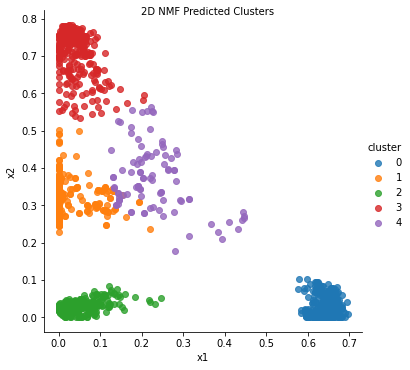

In [146]:
lm = sns.lmplot(data=W_df, x='x1', y='x2',hue='cluster', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D NMF Predicted Clusters", fontsize=10)

Text(0.5, 0.98, '2D NMF Ground Truth')

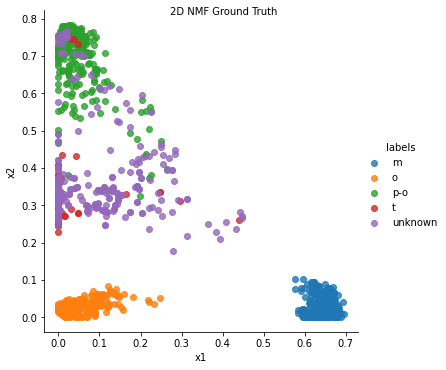

In [147]:
lm = sns.lmplot(data=W_df, x='x1', y='x2',hue='labels', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D NMF Ground Truth", fontsize=10)

In [148]:
import plotly.express as px
fig = px.scatter_3d(
    W_df, x='x1', y='x2', z='x3', color=W_df['labels'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='PCA 3D Ground Truth'
)
fig.show()

In [149]:
fig = px.scatter_3d(
    W_df, x='x1', y='x2', z='x3', color=W_df['cluster'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='PCA 3D Prediction'
)
fig.show()

In [114]:
W_df.head(20)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,cluster,labels
0,0.864809,0.489631,0.000000,0.000000,0.024252,0.094245,0.000000,0.124025,0.037932,0.010110,0.000000,0.000000,2,m
1,0.047425,0.000000,0.057357,0.000000,0.010249,0.201285,1.155818,0.010952,0.059164,0.004686,0.037583,0.000000,1,o
2,0.000000,0.001896,0.062625,0.000000,0.281210,0.000000,0.003144,0.000000,0.041250,0.000000,0.648410,0.000000,0,p-o
3,0.000000,0.000000,0.261624,0.000000,0.000000,0.000000,0.000000,0.000000,0.727476,0.000000,0.017334,0.000000,4,t
4,0.914247,0.312475,0.000000,0.004490,0.027732,0.112060,0.000000,0.129187,0.056872,0.007883,0.007870,0.011870,2,m
5,0.000000,0.022990,0.083205,0.054910,0.296520,0.000000,0.001527,0.000000,0.000000,0.003569,0.624495,0.003555,0,p-o
6,0.000000,0.000000,0.349626,0.016757,0.000000,0.000000,0.074128,0.000000,0.237734,0.293914,0.010643,0.000000,3,unknown
7,0.825762,0.390956,0.005140,0.011432,0.009594,0.078290,0.012125,0.205354,0.027184,0.000000,0.020919,0.033530,2,m
8,0.043864,0.014853,0.073618,0.032235,0.000886,0.238362,1.077050,0.012247,0.069401,0.000000,0.044523,0.019254,1,o
9,0.002598,0.010464,0.069532,0.061362,0.274620,0.000000,0.000689,0.000000,0.000000,0.008276,0.652849,0.000441,0,p-o


In [115]:
# look at the above table
W_df = W_df.replace({'m': 2, 'p-o': 0, 'o': 1, 't': 4, 'unknown': 3})

In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(W_df['labels'], W_df['cluster'])

0.9031884057971015

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(W_df['labels'], W_df['cluster'])